# Problem - 1: Getting Started with Data Exploration - Some Warm up
**Exercises:**

In [27]:
# Import necessary libraries for data manipulation, visualization, and numerical operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Set the plotting style for seaborn and the default figure size for matplotlib
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [29]:
# Load the WorldHappinessReport dataset into a pandas DataFrame
df= pd.read_csv("/content/drive/MyDrive/WorldHappinessReport.csv")

In [30]:
# Print the original column names of the DataFrame.
print("Original columns in the dataset:")
print(df.columns)

Original columns in the dataset:
Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


In [31]:
# Create a copy of the DataFrame with cleaned column names
clean_columns = []
for col in df.columns:
    # 1) Strip spaces from both ends of the column name
    new_col = col.strip()
    # 2) Convert the column name to lower-case
    new_col = new_col.lower()
    # 3) Replace spaces within the column name with underscores
    new_col = new_col.replace(" ", "_")
    # 4) Remove parentheses from the column name
    new_col = new_col.replace("(", "").replace(")", "")
    clean_columns.append(new_col)

# Apply the cleaned column names back to the DataFrame
df.columns = clean_columns

print("Cleaned column names:")
print(df.columns)
print("\n")

# For understanding, create an alias 'gdp_per_capita' for 'log_gdp_per_capita'.
# This ensures consistency with assignment requirements and easier reference.
if "log_gdp_per_capita" in df.columns:
    df["gdp_per_capita"] = df["log_gdp_per_capita"]
else:
    # If 'log_gdp_per_capita' doesn't exist, assume 'gdp_per_capita' is already present.
    pass


Cleaned column names:
Index(['country_name', 'score', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia_+_residual'],
      dtype='object')




1. Data Exploration and Understanding:


• Dataset Overview:


1. Load the dataset and display the first 10 rows.


In [32]:
# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  country_name  score  log_gdp_per_capita  social_support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

2. Identify the number of rows and columns in the dataset.


In [33]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape
# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 143
Number of columns: 10


3. List all the columns and their data types.


In [34]:
# Print the column names and their respective data types
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
country_name                     object
score                           float64
log_gdp_per_capita              float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dystopia_+_residual             float64
gdp_per_capita                  float64
dtype: object


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [35]:
# Calculate the mean, median, and standard deviation of the 'score' column
score_mean = df["score"].mean()
score_median = df["score"].median()
score_std = df["score"].std()

# Print the calculated statistics with 3 decimal places
print("Basic statistics for happiness score:")
print(f"Mean score   : {score_mean:.3f}")
print(f"Median score : {score_median:.3f}")
print(f"Std. dev     : {score_std:.3f}")

Basic statistics for happiness score:
Mean score   : 5.528
Median score : 5.785
Std. dev     : 1.171


2. Identify the country with the highest and lowest happiness scores.


In [36]:
# Find the index of the highest and lowest 'score' in the DataFrame
max_score_idx = df["score"].idxmax()
min_score_idx = df["score"].idxmin()

# Use these indices to get the 'country_name' for the highest and lowest scores
highest_country = df.loc[max_score_idx, "country_name"]
lowest_country = df.loc[min_score_idx, "country_name"]

# Print the country with the highest score and its value (formatted to 3 decimal places)
print(f"Country with highest score: {highest_country} (score = {df.loc[max_score_idx, 'score']:.3f})")
# Print the country with the lowest score and its value (formatted to 3 decimal places)
print(f"Country with lowest score : {lowest_country} (score = {df.loc[min_score_idx, 'score']:.3f})")

Country with highest score: Finland (score = 7.741)
Country with lowest score : Afghanistan (score = 1.721)


• Missing Values:


1. Check if there are any missing values in the dataset. If so, display the total count for each column

In [37]:
print("Missing values per column:")
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()
print(missing_values)

Missing values per column:
country_name                    0
score                           0
log_gdp_per_capita              3
social_support                  3
healthy_life_expectancy         3
freedom_to_make_life_choices    3
generosity                      3
perceptions_of_corruption       3
dystopia_+_residual             3
gdp_per_capita                  3
dtype: int64


In [38]:
# If there are missing values in key numeric columns, we may choose to drop or fill them.
# Here we demonstrate (commented out) how you might drop rows with missing values
# in 'score' or 'gdp_per_capita', as these are essential for most analyses.
# You can modify this behavior as needed.

# key_columns = ["score", "gdp_per_capita"]
# rows_before = len(df)
# df = df.dropna(subset=key_columns)
# rows_after = len(df)

# if rows_before != rows_after:
#     print(f"Dropped {rows_before - rows_after} rows due to missing key values (score/gdp).\n")

• Filtering and Sorting:


1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [39]:
high_happiness_df = df[df["score"] > 7.5]

print("Countries with happiness score > 7.5:")
print(high_happiness_df[["country_name", "score", "gdp_per_capita"]])

Countries with happiness score > 7.5:
  country_name  score  gdp_per_capita
0      Finland  7.741           1.844
1      Denmark  7.583           1.908
2      Iceland  7.525           1.881


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.


In [40]:
high_happiness_sorted = high_happiness_df.sort_values(by="gdp_per_capita", ascending=False)

print("Top 10 high-score countries sorted by GDP per capita:")
print(high_happiness_sorted[["country_name", "score", "gdp_per_capita"]].head(10))

Top 10 high-score countries sorted by GDP per capita:
  country_name  score  gdp_per_capita
1      Denmark  7.583           1.908
2      Iceland  7.525           1.881
0      Finland  7.741           1.844


• Adding New Columns:


1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

        Low − (Score < 4)

        Medium − (4 ≤ Score ≤ 6)

        High − (Score > 6)


In [41]:
df["happiness_category"] = pd.cut(
    df["score"],
    bins=[-np.inf, 4, 6, np.inf],
    labels=["Low", "Medium", "High"],
    include_lowest=True
)

print(df[["country_name", "score", "happiness_category"]].head())

  country_name  score happiness_category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


**2. Data Visualizations:**



• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

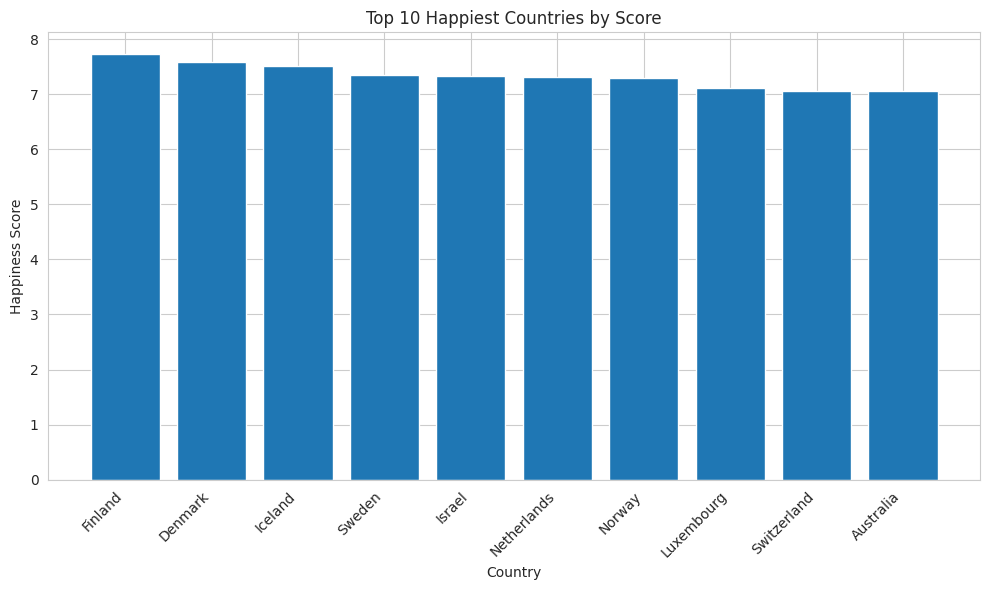

In [42]:
# Sort the DataFrame by 'score' in descending order and select the top 10 happiest countries
top10_happiest = df.sort_values(by="score", ascending=False).head(10)

# Create a new figure for the plot
plt.figure()
# Create a bar plot using country names on the x-axis and happiness scores on the y-axis
plt.bar(top10_happiest["country_name"], top10_happiest["score"])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
# Set x-axis label
plt.xlabel("Country")
# Set y-axis label
plt.ylabel("Happiness Score")
# Set the title of the plot
plt.title("Top 10 Happiest Countries by Score")
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Display the plot
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

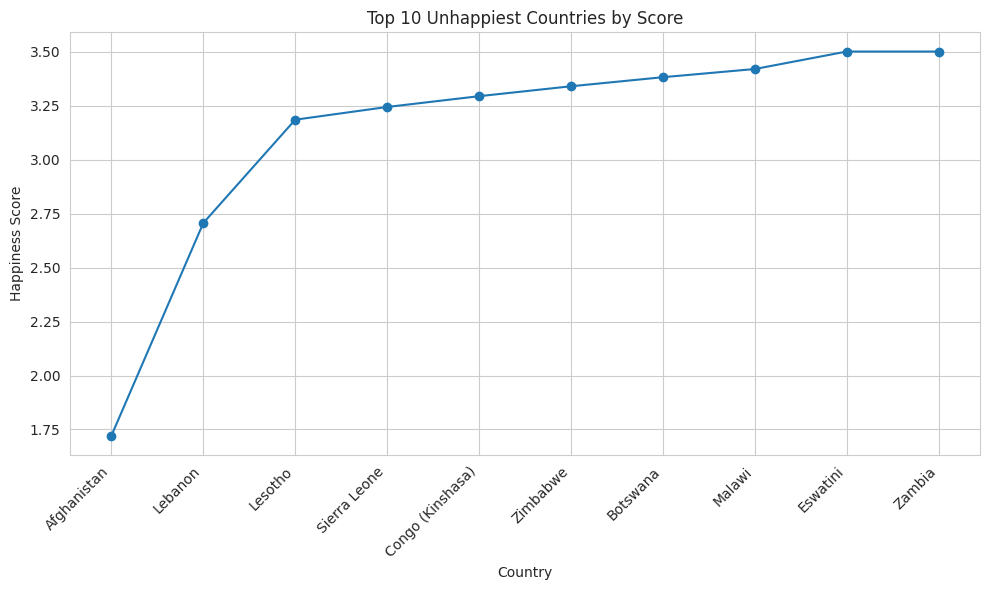

In [43]:
bottom10_unhappiest = df.sort_values(by="score", ascending=True).head(10)


plt.figure()
plt.plot(bottom10_unhappiest["country_name"], bottom10_unhappiest["score"], marker="o")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Unhappiest Countries by Score")
plt.tight_layout()
plt.show()


• Plot a histogram for the Score column to show its distribution and also interpret.

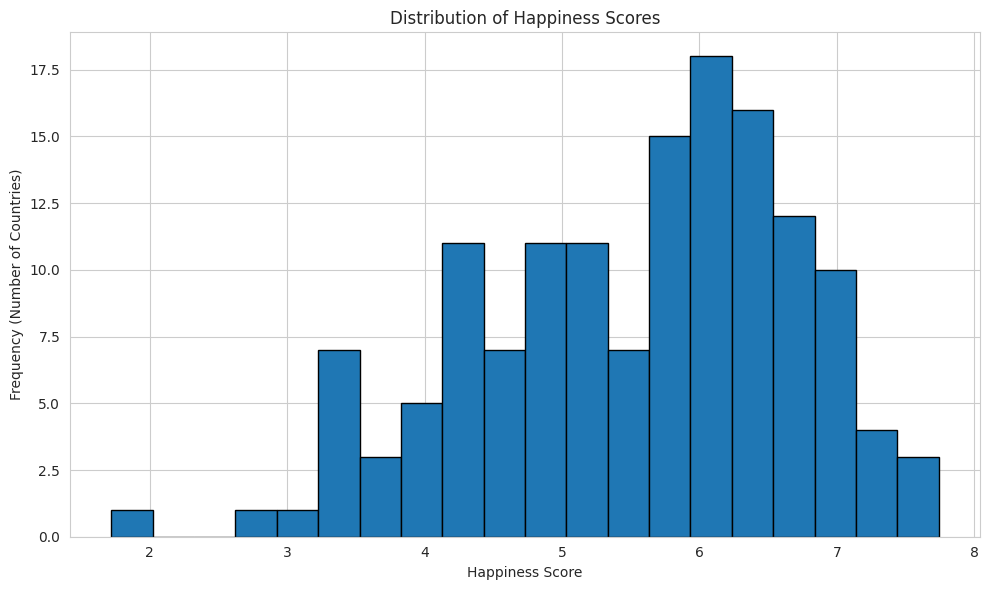

In [44]:
plt.figure()
plt.hist(df["score"], bins=20, edgecolor="black")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency (Number of Countries)")
plt.title("Distribution of Happiness Scores")
plt.tight_layout()
plt.show()

**Observation:**
The distribution of happiness scores worldwide is shown by the histogram.  With a small skew towards higher values, the distribution seems to be roughly unimodal.  Most nations have scores between 4.5 and 6.5.  There are a moderate number of high-performing nations (above 7) and very few with exceptionally low scores (below 3).  This implies that although extreme suffering is uncommon, reaching extremely high levels of happiness is also unique to a particular group of countries.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.


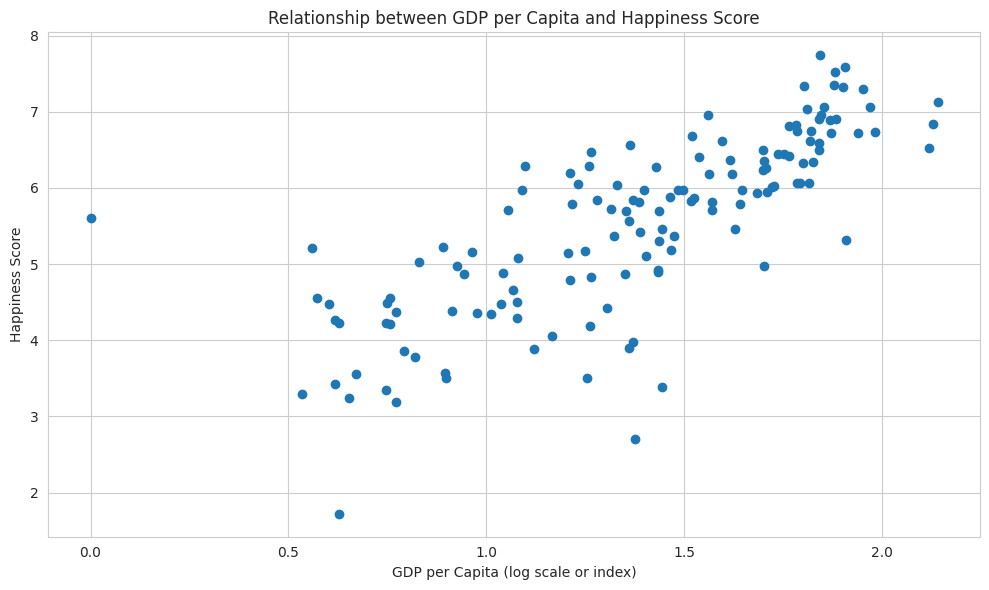

In [45]:
plt.figure()
plt.scatter(df["gdp_per_capita"], df["score"])
plt.xlabel("GDP per Capita (log scale or index)")
plt.ylabel("Happiness Score")
plt.title("Relationship between GDP per Capita and Happiness Score")
plt.tight_layout()
plt.show()

# Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]


In [46]:
south_asian_countries_raw = [
"Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka",]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}


In [47]:
df["country_name_lower"] = df["country_name"].str.lower()
south_asian_countries_lower = [c.lower() for c in south_asian_countries_raw]


south_asia_df = df[df["country_name_lower"].isin(south_asian_countries_lower)].copy()


print("South Asian countries found in the dataset:")
print(south_asia_df[["country_name", "score", "gdp_per_capita"]])

South Asian countries found in the dataset:
    country_name  score  gdp_per_capita
92         Nepal  5.158           0.965
107     Pakistan  4.657           1.069
125        India  4.054           1.166
127    Sri Lanka  3.898           1.361
128   Bangladesh  3.886           1.122
142  Afghanistan  1.721           0.628


3. Save the filtered dataframe as separate CSV files for future use.


In [48]:
south_asia_csv_name = "south_asia_happiness.csv"
south_asia_df.to_csv(south_asia_csv_name, index=False)
print(f"South Asia dataset saved as: {south_asia_csv_name}")

South Asia dataset saved as: south_asia_happiness.csv


Task - 2 - Composite Score Ranking:


Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [49]:
south_asia_df["composite_score"] = (
0.40 * south_asia_df["gdp_per_capita"]
+ 0.30 * south_asia_df["social_support"]
+ 0.30 * south_asia_df["healthy_life_expectancy"]
)
print(south_asia_df[['country_name', 'composite_score']])

    country_name  composite_score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


2. Rank the South Asian countries based on the Composite Score in descending order

In [50]:
south_asia_ranked = south_asia_df.sort_values(by="composite_score", ascending=False)


print("South Asian countries ranked by Composite Score:")
print(south_asia_ranked[["country_name", "score", "composite_score"]])

South Asian countries ranked by Composite Score:
    country_name  score  composite_score
127    Sri Lanka  3.898           1.0739
92         Nepal  5.158           0.8159
125        India  4.054           0.7874
107     Pakistan  4.657           0.7039
128   Bangladesh  3.886           0.6774
142  Afghanistan  1.721           0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

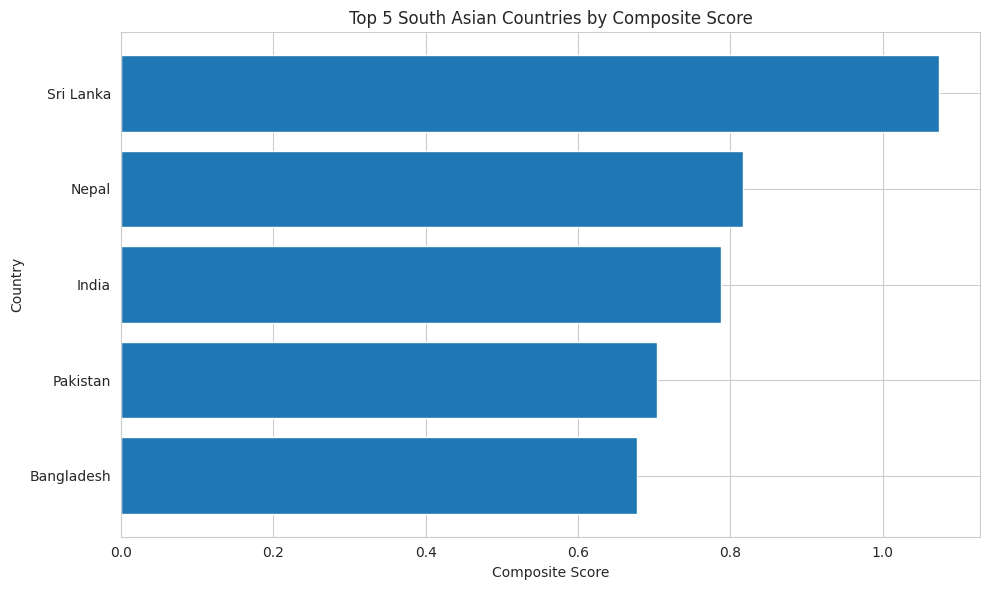

In [51]:
top5_composite = south_asia_ranked.head(5)

plt.figure()
plt.barh(top5_composite["country_name"], top5_composite["composite_score"])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

**Discussion:**
Although there are some small differences, the rankings derived from the custom Composite Score **(0.4 * GDP + 0.3 * Social + 0.3 * Health)** largely match the original Happiness Score.  Countries with robust economies but somewhat weaker social support may rank higher here than in the standard report because GDP per capita has a higher weight (40%) in this composite formula than the other two factors.  Due to comparatively better GDP and health statistics than its neighbors, Sri Lanka leads South Asia in this composite metric, which is consistent with its ranking near the top of the regional initial scores.

In [52]:
south_asia_ranked_all = south_asia_df.copy()
south_asia_ranked_all["rank_by_score"] = south_asia_ranked_all["score"].rank(ascending=False, method="min")
south_asia_ranked_all["rank_by_composite"] = south_asia_ranked_all["composite_score"].rank(ascending=False, method="min")


print("Comparison of rankings (Score vs Composite):")
print(south_asia_ranked_all[[
"country_name", "score", "composite_score", "rank_by_score", "rank_by_composite"
]].sort_values(by="rank_by_score"))

Comparison of rankings (Score vs Composite):
    country_name  score  composite_score  rank_by_score  rank_by_composite
92         Nepal  5.158           0.8159            1.0                2.0
107     Pakistan  4.657           0.7039            2.0                4.0
125        India  4.054           0.7874            3.0                3.0
127    Sri Lanka  3.898           1.0739            4.0                1.0
128   Bangladesh  3.886           0.6774            5.0                5.0
142  Afghanistan  1.721           0.3238            6.0                6.0


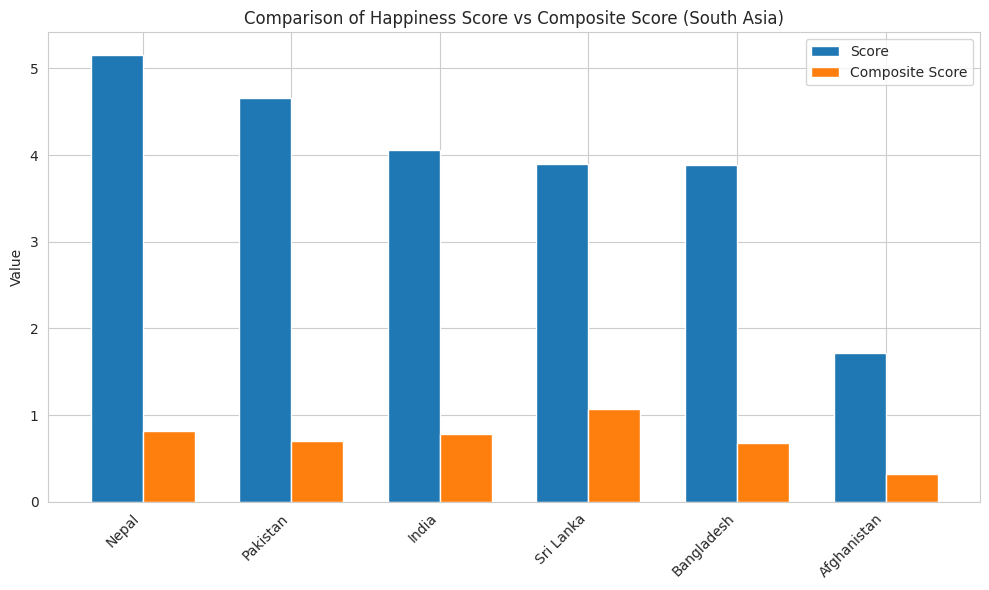

In [53]:
# visualization of side-by-side bars for score and composite score

plt.figure()
index = np.arange(len(south_asia_ranked_all))
bar_width = 0.35

plt.bar(index, south_asia_ranked_all["score"], bar_width, label="Score")
plt.bar(index + bar_width, south_asia_ranked_all["composite_score"], bar_width, label="Composite Score")

plt.xticks(index + bar_width / 2, south_asia_ranked_all["country_name"], rotation=45, ha="right")
plt.ylabel("Value")
plt.title("Comparison of Happiness Score vs Composite Score (South Asia)")
plt.legend()
plt.tight_layout()
plt.show()

Task - 3 - Outlier Detection:


Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

In [54]:
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers
outlier_scores = identify_outliers(south_asia_df['score'])
outlier_gdp = identify_outliers(south_asia_df['gdp_per_capita'])

3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.


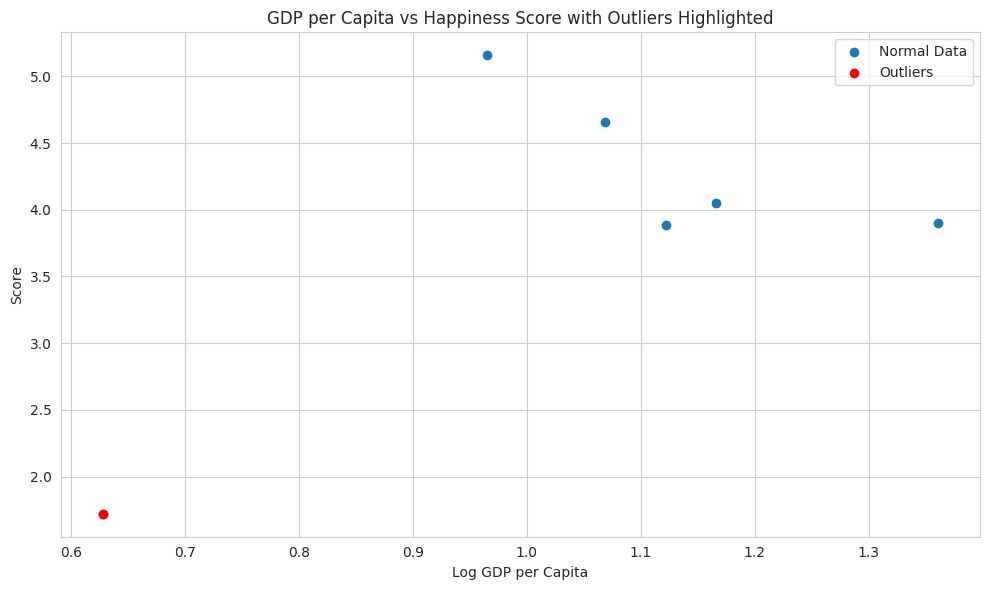

In [55]:
plt.figure(figsize=(10,6))
outlier = south_asia_df[south_asia_df['score'].isin(outlier_scores) | south_asia_df['gdp_per_capita'].isin(outlier_gdp)]
plt.scatter(south_asia_df['gdp_per_capita'], south_asia_df['score'], alpha=1, label='Normal Data')
plt.scatter(outlier['gdp_per_capita'], outlier['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('GDP per Capita vs Happiness Score with Outliers Highlighted')
plt.legend()
plt.tight_layout()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.


**Discussion:** Afghanistan is recognized as a clear outlier based on the scatter plot and IQR analysis.  It has the lowest GDP per capita and the lowest Happiness Score in the region (and worldwide) and is located in the bottom-left corner of the plot.

 **Impact:** Afghanistan considerably lowers the regional average (mean) for South Asia as a severe outlier on the lower end.  The regional average for GDP and happiness would both significantly rise if eliminated.  Compared to the rest of the region, this outlier status reflects severe political and socioeconomic instability.

Task - 4 - Exploring Trends Across Metrics:


Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [56]:
metric1 = 'freedom_to_make_life_choices'
metric2 = 'generosity'
correlation1 = south_asia_df['score'].corr(south_asia_df[metric1])
correlation2 = south_asia_df['score'].corr(south_asia_df[metric2])
print(f"Correlation between Score and Freedom to make life choices: {correlation1:.3f}")
print(f"Correlation between Score and Generosity: {correlation2:.3f}")

Correlation between Score and Freedom to make life choices: 0.801
Correlation between Score and Generosity: 0.875


2. Create scatter plots with trendlines for these metrics against the Score.


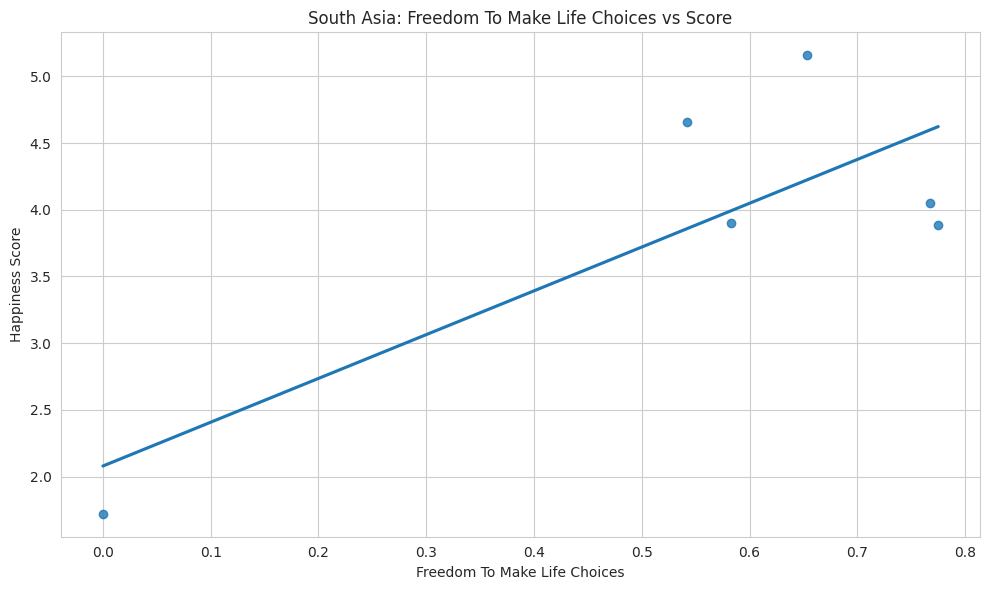

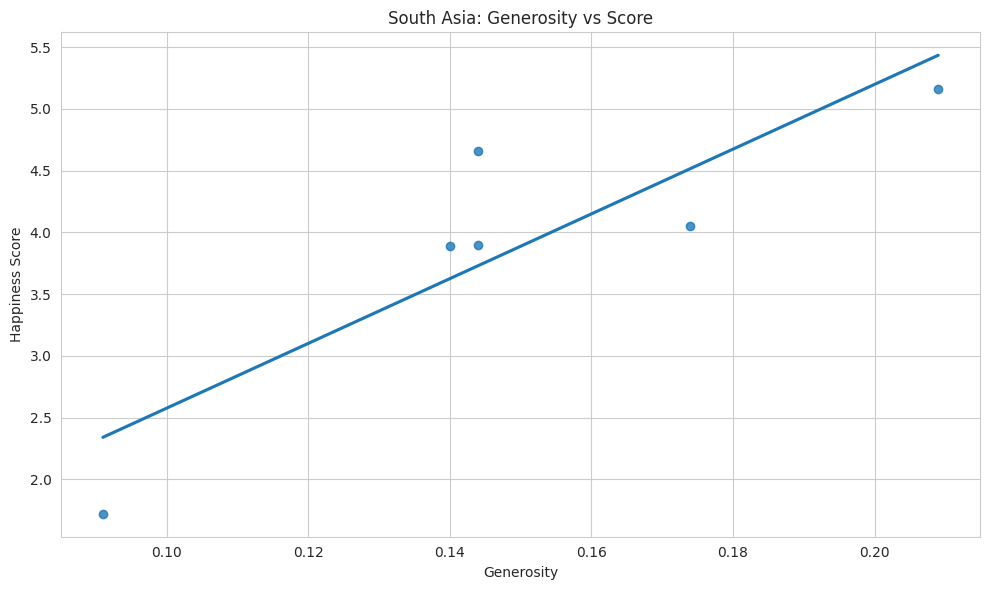

In [77]:
metric1 = 'freedom_to_make_life_choices'
metric2 = 'generosity'

# Plot for Freedom to Make Life Choices
if metric1 in south_asia_df.columns:
    plt.figure()
    sns.regplot(x=south_asia_df[metric1], y=south_asia_df["score"], ci=None)
    plt.xlabel(metric1.replace("_", " ").title())
    plt.ylabel("Happiness Score")
    print("\n")
    plt.title(f"South Asia: {metric1.replace('_', ' ').title()} vs Score")
    plt.tight_layout()
    plt.show()

# Plot for Generosity
if metric2 in south_asia_df.columns:
    plt.figure()
    sns.regplot(x=south_asia_df[metric2], y=south_asia_df["score"], ci=None)
    plt.xlabel(metric2.replace("_", " ").title())
    plt.ylabel("Happiness Score")
    print("\n")
    plt.title(f"South Asia: {metric2.replace('_', ' ').title()} vs Score")
    plt.tight_layout()
    plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.


**Observation:**


*   Freedom to Make Life Choices: In South Asia, there is a significant positive association (0.801) between Freedom and Happiness Score. This implies that a key factor influencing well-being in this area is the people's sense of freedom.

*   Generosity: There is a strong positive correlation (0.875) with Happiness Score.


*   Conclusion: Although both are important positive factors, generosity unexpectedly has a higher connection with happiness in this particular dataset for South Asia than does freedom. The happiness score constantly rises as these measurements increase.


Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [58]:
south_asia_df["gdp_score_gap"] = south_asia_df["gdp_per_capita"] - south_asia_df["score"]

2. Rank the South Asian countries by this gap in both ascending and descending order

In [59]:
gap_sorted_ascending = south_asia_df.sort_values(by="gdp_score_gap", ascending=True)
gap_sorted_descending = south_asia_df.sort_values(by="gdp_score_gap", ascending=False)


print("South Asia countries by GDP-Score Gap (ascending):")
print(gap_sorted_ascending[["country_name", "gdp_per_capita", "score", "gdp_score_gap"]])
print("\n")

print("South Asia countries by GDP-Score Gap (descending):")
print(gap_sorted_descending[["country_name", "gdp_per_capita", "score", "gdp_score_gap"]])

South Asia countries by GDP-Score Gap (ascending):
    country_name  gdp_per_capita  score  gdp_score_gap
92         Nepal           0.965  5.158         -4.193
107     Pakistan           1.069  4.657         -3.588
125        India           1.166  4.054         -2.888
128   Bangladesh           1.122  3.886         -2.764
127    Sri Lanka           1.361  3.898         -2.537
142  Afghanistan           0.628  1.721         -1.093


South Asia countries by GDP-Score Gap (descending):
    country_name  gdp_per_capita  score  gdp_score_gap
142  Afghanistan           0.628  1.721         -1.093
127    Sri Lanka           1.361  3.898         -2.537
128   Bangladesh           1.122  3.886         -2.764
125        India           1.166  4.054         -2.888
107     Pakistan           1.069  4.657         -3.588
92         Nepal           0.965  5.158         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.


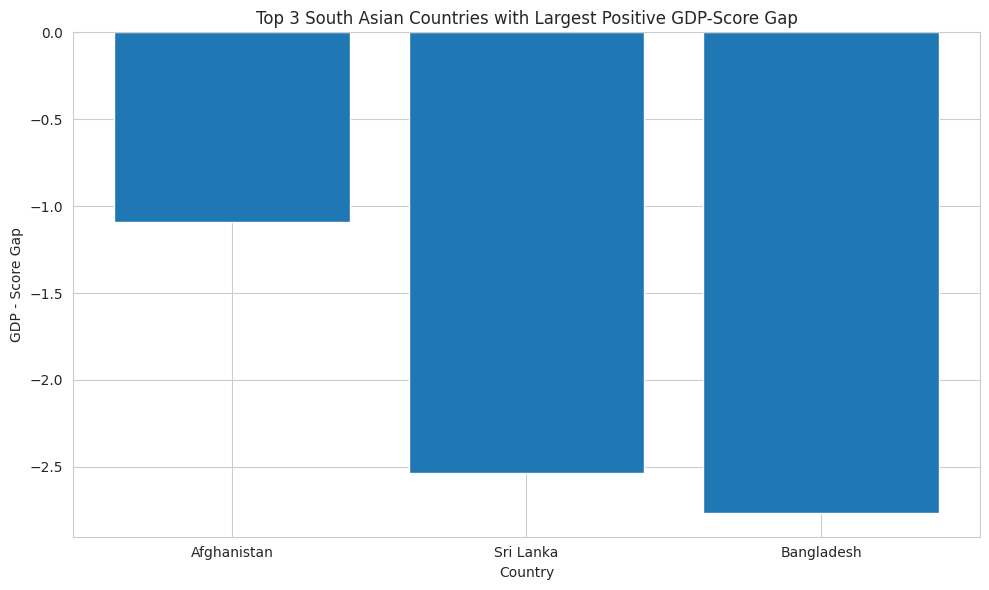

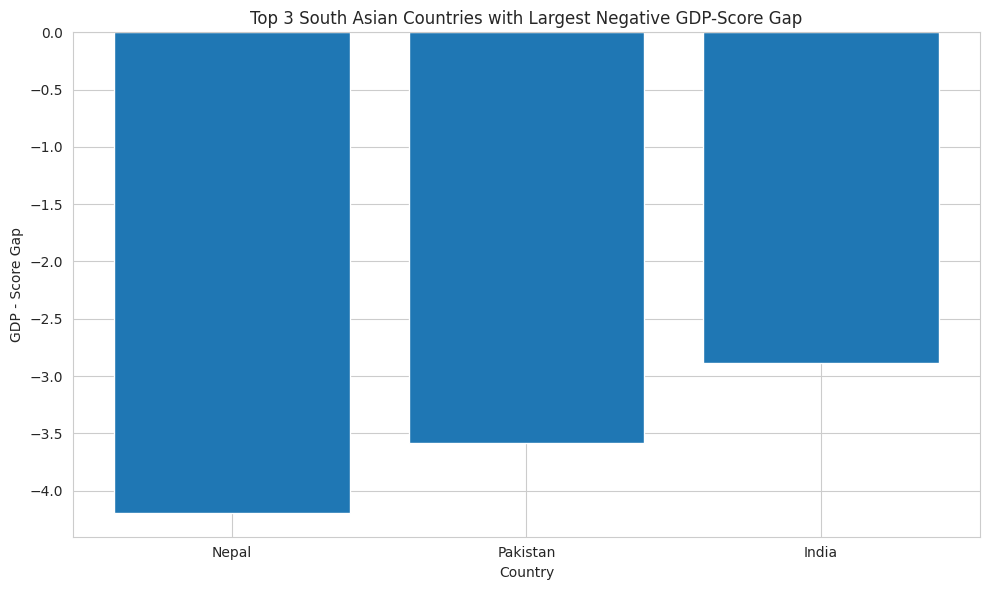

In [60]:
# Largest positive gaps (GDP >> Score)
top3_positive_gap = gap_sorted_descending.head(3)

plt.figure()
plt.bar(top3_positive_gap["country_name"], top3_positive_gap["gdp_score_gap"])
plt.xlabel("Country")
plt.ylabel("GDP - Score Gap")
plt.title("Top 3 South Asian Countries with Largest Positive GDP-Score Gap")
plt.tight_layout()
plt.show()

print("\n")

# Largest negative gaps (Score >> GDP)
top3_negative_gap = gap_sorted_ascending.head(3)

plt.figure()
plt.bar(top3_negative_gap["country_name"], top3_negative_gap["gdp_score_gap"])
plt.xlabel("Country")
plt.ylabel("GDP - Score Gap")
plt.title("Top 3 South Asian Countries with Largest Negative GDP-Score Gap")
plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.


**Analysis:** The "GDP-Score Gap" calculates the difference between economic output (Log GDP) and reported life satisfaction (Score).

*   Negative Gaps (Score > GDP): Large negative gaps (about -4.2) exist in nations like Nepal. This suggests that the happiness score is disproportionately high despite having a lower GDP. This implies that non-economic elements like family dynamics, cultural resilience, and social support are making up for financial difficulties.

*   Closer to Zero (GDP ≈ Score): Nations with a smaller gap depend more on economic issues to determine their level of happiness.
*   Implication: Relying more on social capital than financial capital, South Asian countries typically "outperform" their economic statistics in terms of happiness.

**3.3 Problem - 3 - Comparative Analysis:**

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

    middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"]

In [61]:
middle_east_countries_raw = [
"Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman","Palestine","State of Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen",]

middle_east_countries_lower = [c.lower() for c in middle_east_countries_raw]

middle_east_df = df[df["country_name_lower"].isin(middle_east_countries_lower)].copy()

print("Middle Eastern countries found in the dataset:")
print(middle_east_df[["country_name", "score", "gdp_per_capita"]])
print("\n")

# Added a "region" column to both South Asia and Middle East dataframes for easier comparison
south_asia_df["region"] = "South Asia"
middle_east_df["region"] = "Middle East"

# Combined them into one dataframe when needed
combined_region_df = pd.concat([south_asia_df, middle_east_df], ignore_index=True)

Middle Eastern countries found in the dataset:
             country_name  score  gdp_per_capita
4                  Israel  7.341           1.803
12                 Kuwait  6.951           1.845
21   United Arab Emirates  6.733           1.983
27           Saudi Arabia  6.594           1.842
61                Bahrain  5.959             NaN
91                   Iraq  5.166           1.249
99                   Iran  4.923           1.435
102    State of Palestine  4.879             NaN
124                Jordan  4.186           1.262
132                 Yemen  3.561           0.671
141               Lebanon  2.707           1.377




Complete the following task:

1. Descriptive Statistics:



• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [62]:
region_stats = combined_region_df.groupby("region")["score"].agg(["mean", "std"]).reset_index()

print("Mean and standard deviation of score by region:")
print(region_stats)

Mean and standard deviation of score by region:
        region      mean       std
0  Middle East  5.363636  1.494498
1   South Asia  3.895667  1.177069


• Which region has higher happiness Scores on average?

In [63]:
if (region_stats.loc[region_stats["region"] == "South Asia", "mean"].values[0] >
    region_stats.loc[region_stats["region"] == "Middle East", "mean"].values[0]):
  print("South Asia has a higher average happiness score than the Middle East.")
else:
  print("Middle East has a higher average happiness score than South Asia.")

Middle East has a higher average happiness score than South Asia.


2. Top and Bottom Performers:


• Identify the top 3 and bottom 3 countries in each region based on the score.


In [64]:
print("Top 3 and Bottom 3 countries by score in each region:\n")

for region_name, region_df_single in combined_region_df.groupby("region"):
  print(f"Region: {region_name}")
  top3 = region_df_single.sort_values(by="score", ascending=False).head(3)
  bottom3 = region_df_single.sort_values(by="score", ascending=True).head(3)

  print(" Top 3:")
  print(top3[["country_name", "score"]])
  print(" Bottom 3:")
  print(bottom3[["country_name", "score"]])

Top 3 and Bottom 3 countries by score in each region:

Region: Middle East
 Top 3:
           country_name  score
6                Israel  7.341
7                Kuwait  6.951
8  United Arab Emirates  6.733
 Bottom 3:
   country_name  score
16      Lebanon  2.707
15        Yemen  3.561
14       Jordan  4.186
Region: South Asia
 Top 3:
  country_name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054
 Bottom 3:
  country_name  score
5  Afghanistan  1.721
4   Bangladesh  3.886
3    Sri Lanka  3.898


• Plot bar charts comparing these charts

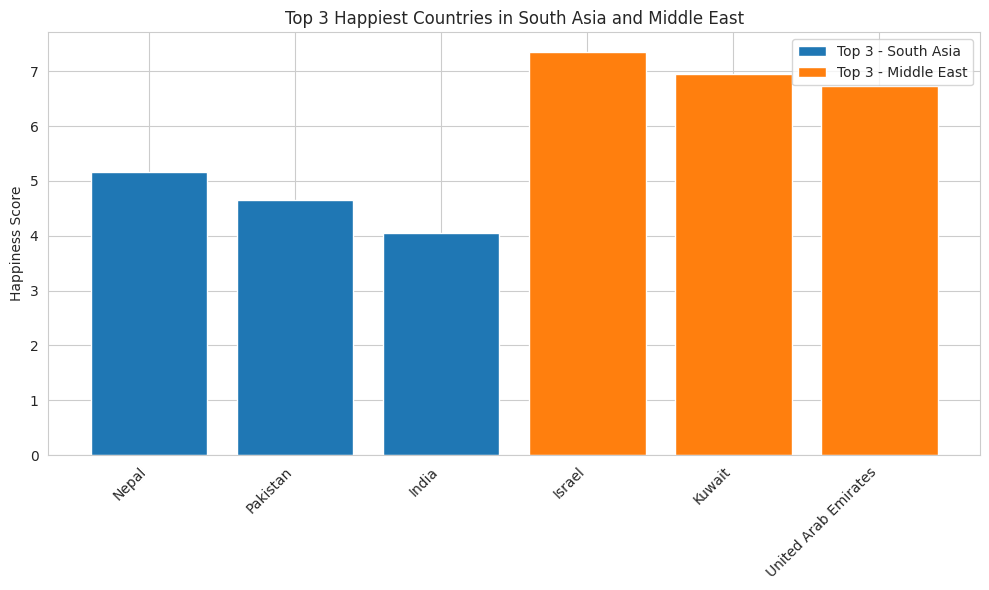

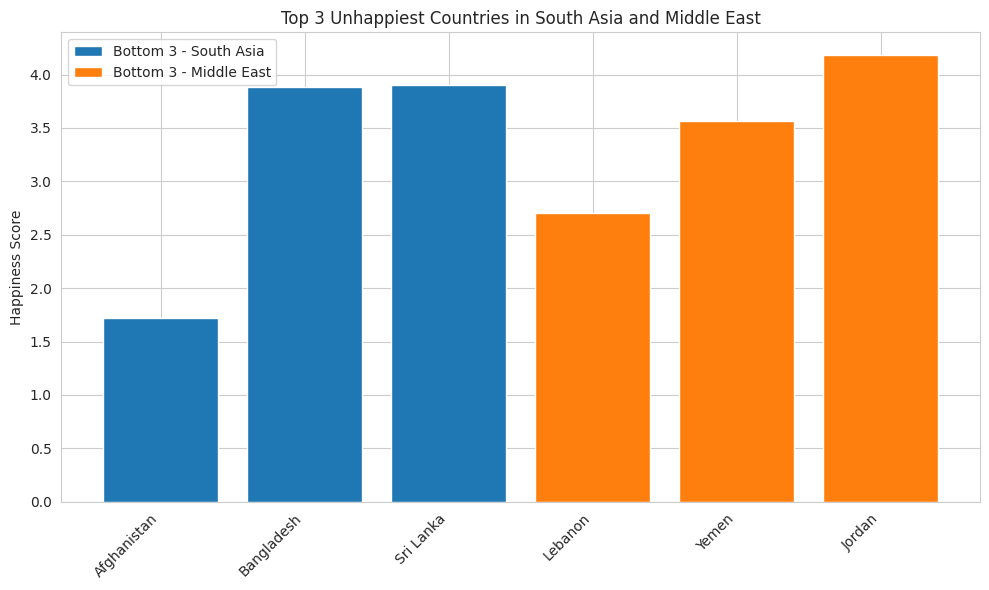

In [79]:
plt.figure()

# South Asia Top 3
sa_df = combined_region_df[combined_region_df["region"] == "South Asia"]
sa_top3 = sa_df.sort_values(by="score", ascending=False).head(3)

plt.bar(sa_top3["country_name"], sa_top3["score"], label="Top 3 - South Asia")

# Middle East Top 3
me_df = combined_region_df[combined_region_df["region"] == "Middle East"]
me_top3 = me_df.sort_values(by="score", ascending=False).head(3)

plt.bar(me_top3["country_name"], me_top3["score"], label="Top 3 - Middle East")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Happiness Score")
plt.title("Top 3 Happiest Countries in South Asia and Middle East")
plt.legend()
plt.tight_layout()
plt.show()

print("\n")

plt.figure()

# South Asia Bottom 3
sa_bottom3 = sa_df.sort_values(by="score", ascending=True).head(3)
plt.bar(sa_bottom3["country_name"], sa_bottom3["score"], label="Bottom 3 - South Asia")

# Middle East Bottom 3
me_bottom3 = me_df.sort_values(by="score", ascending=True).head(3)
plt.bar(me_bottom3["country_name"], me_bottom3["score"], label="Bottom 3 - Middle East")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Happiness Score")
plt.title("Top 3 Unhappiest Countries in South Asia and Middle East")
plt.legend()
plt.tight_layout()
plt.show()


3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.


In [66]:
metrics_for_comparison = ["gdp_per_capita", "social_support", "healthy_life_expectancy"]

metric_means = combined_region_df.groupby("region")[metrics_for_comparison].mean().reset_index()

print("Mean of key metrics (GDP, Social Support, Life Expectancy) by region:")
print(metric_means)


Mean of key metrics (GDP, Social Support, Life Expectancy) by region:
        region  gdp_per_capita  social_support  healthy_life_expectancy
0  Middle East        1.496333        1.152778                 0.554111
1   South Asia        1.051833        0.611833                 0.420333


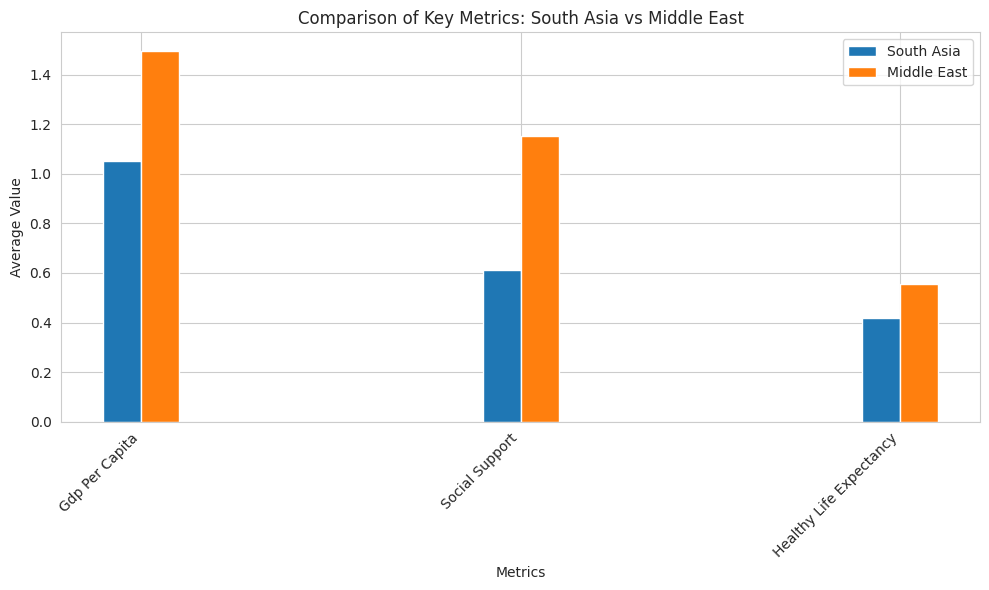

In [81]:
# Grouped bar chart for each metric


# plt.figure(figsize=(10, 6))

# # Metrics in order
# metrics_for_comparison = ["gdp_per_capita", "social_support", "healthy_life_expectancy"]

# # Extracted values for each metric
# sa_gdp = metric_means.loc[metric_means["region"] == "South Asia", "gdp_per_capita"].values[0]
# sa_support = metric_means.loc[metric_means["region"] == "South Asia", "social_support"].values[0]
# sa_life = metric_means.loc[metric_means["region"] == "South Asia", "healthy_life_expectancy"].values[0]

# me_gdp = metric_means.loc[metric_means["region"] == "Middle East", "gdp_per_capita"].values[0]
# me_support = metric_means.loc[metric_means["region"] == "Middle East", "social_support"].values[0]
# me_life = metric_means.loc[metric_means["region"] == "Middle East", "healthy_life_expectancy"].values[0]

# # Put them into lists manually
# south_asia_values = [sa_gdp, sa_support, sa_life]
# middle_east_values = [me_gdp, me_support, me_life]

# # X positions
# x = np.arange(len(metrics_for_comparison))
# width = 0.10

# # Bars for both regions
# plt.bar(x - width/2, south_asia_values, width, label="South Asia")
# plt.bar(x + width/2, middle_east_values, width, label="Middle East")

# # Labels
# plt.xticks(x, ["GDP Per Capita", "Social Support", "Healthy Life Expectancy"], rotation=45, ha="right")
# plt.xlabel("Metrics")
# plt.ylabel("Average Value")
# plt.title("Comparison of Key Metrics: South Asia vs Middle East")
# plt.legend()

# plt.tight_layout()
# plt.show()




plt.figure(figsize=(10,6))
metrics_for_comparison = ["gdp_per_capita", "social_support", "healthy_life_expectancy"]

# Extract the mean values for each region
south_asia_values = metric_means[metric_means["region"] == "South Asia"][metrics_for_comparison].values.flatten()
middle_east_values = metric_means[metric_means["region"] == "Middle East"][metrics_for_comparison].values.flatten()

# Define positions and width for the bars
x = np.arange(len(metrics_for_comparison)) # the label locations
width = 0.10

plt.bar(x - width/2, south_asia_values, width, label='South Asia')
plt.bar(x + width/2, middle_east_values, width, label='Middle East')
plt.xticks(x, [m.replace("_", " ").title() for m in metrics_for_comparison], rotation=45, ha="right") # Use metric names as labels
plt.xlabel("Metrics")
plt.ylabel("Average Value")
plt.title("Comparison of Key Metrics: South Asia vs Middle East")
plt.legend()

plt.tight_layout()
plt.show()

• Which metrics show the largest disparity between the two regions?

**Observation:** The grouped bar charts highlight significant disparities between the two regions:

*   Social Support: The biggest absolute difference in mean scores is displayed by this indicator.  South Asia trails far behind with a mean of 0.61, whereas the Middle East has a mean of almost 1.15.  This implies that, in comparison to South Asia, the Middle East has a far higher perceived social safety net and community reliability.

*    GDP per capita: A clear economic gap exists.  South Asia (Mean: ~1.05) consistently has lower scores than the Middle East (Mean: ~1.50).  This mismatch indicates a significant gap in real economic purchasing power and level of living because this measure is logarithmic.

*    Healthy Life Expectancy: This measure has the smallest disparity (Middle East: 0.55 vs. South Asia: 0.42), suggesting that fundamental health results are significantly more comparable between the areas despite the significant variations in wealth.



4. Happiness Disparity:


• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [68]:
for region_name, region_df_single in combined_region_df.groupby("region"):
    score_series = region_df_single["score"]
    score_range = score_series.max() - score_series.min()
    score_mean = score_series.mean()
    score_std = score_series.std()
    cv = score_std / score_mean if score_mean != 0 else np.nan


    print(f"Region: {region_name}")
    print(f" Range of score: {score_range:.3f}")
    print(f" Coefficient of Variation (CV): {cv:.3f}\n")

Region: Middle East
 Range of score: 4.634
 Coefficient of Variation (CV): 0.279

Region: South Asia
 Range of score: 3.437
 Coefficient of Variation (CV): 0.302



• Which region has greater variability in happiness?


**Observation:** The Middle East exhibits greater absolute variability in happiness compared to South Asia.

*   Standard Deviation: Compared to South Asia (1.18), the Middle East has a greater standard deviation (1.49).  This suggests that the Middle East's happiness levels differ more from the mean.

*    Range: Compared to South Asia (3.44), the Middle East has a much larger range of scores (4.63).

**Interpretation:** The great economic and political diversity of the Middle East is reflected in its high degree of variability.  It includes some of the richest and most stable countries in the world, such Saudi Arabia and the United Arab Emirates, as well as nations that are experiencing extreme violence and instability, like Yemen and Lebanon.  Despite having a lower average score, South Asia's distribution is more concentrated, indicating a more consistent level of happiness among its nations (except from Afghanistan).

5. Correlation Analysis:


• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [69]:
metric1 = 'freedom_to_make_life_choices'
metric2 = 'generosity'

# Calculate correlation for South Asia between 'score' and metric1
south_corr_metric1 = south_asia_df['score'].corr(south_asia_df[metric1])
# Calculate correlation for South Asia between 'score' and metric2
south_corr_metric2 = south_asia_df['score'].corr(south_asia_df[metric2])

# Print South Asia correlations
print(f"South Asia correlation between Score and Freedom: {south_corr_metric1:.3f}")
print(f"South Asia correlation between Score and Generosity: {south_corr_metric2:.3f}")

# Calculate correlation for Middle East between 'score' and metric1
middle_corr_metric1 = middle_east_df['score'].corr(middle_east_df[metric1])
# Calculate correlation for Middle East between 'score' and metric2
middle_corr_metric2 = middle_east_df['score'].corr(middle_east_df[metric2])

# Print Middle East correlations
print(f"Middle East correlation between Score and Freedom: {middle_corr_metric1:.3f}")
print(f"Middle East correlation between Score and Generosity: {middle_corr_metric2:.3f}")

South Asia correlation between Score and Freedom: 0.801
South Asia correlation between Score and Generosity: 0.875
Middle East correlation between Score and Freedom: 0.863
Middle East correlation between Score and Generosity: 0.628


In [70]:
print(f"Correlation of score with other metrics in Middle East:")
metric_me1 = "freedom_to_make_life_choices"
# Check if the metric exists in the Middle East DataFrame and calculate Pearson correlation
if metric_me1 in middle_east_df.columns:
  corr_value_me1 = middle_east_df[["score", metric_me1]].corr(method="pearson").iloc[0, 1]
  print(f" Pearson correlation between score and {metric_me1}: {corr_value_me1:.3f}")

metric_me2 = "generosity"
# Check if the metric exists in the Middle East DataFrame and calculate Pearson correlation
if metric_me2 in middle_east_df.columns:
  corr_value_me2 = middle_east_df[["score", metric_me2]].corr(method="pearson").iloc[0, 1]
  print(f" Pearson correlation between score and {metric_me2}: {corr_value_me2:.3f}")

print(f"Correlation of score with other metrics in South Asia:")
metric_sa1 = "freedom_to_make_life_choices"
# Check if the metric exists in the South Asia DataFrame and calculate Pearson correlation
if metric_sa1 in south_asia_df.columns:
  corr_value_sa1 = south_asia_df[["score", metric_sa1]].corr(method="pearson").iloc[0, 1]
  print(f" Pearson correlation between score and {metric_sa1}: {corr_value_sa1:.3f}")

metric_sa2 = "generosity"
# Check if the metric exists in the South Asia DataFrame and calculate Pearson correlation
if metric_sa2 in south_asia_df.columns:
  corr_value_sa2 = south_asia_df[["score", metric_sa2]].corr(method="pearson").iloc[0, 1]
  print(f" Pearson correlation between score and {metric_sa2}: {corr_value_sa2:.3f}")

Correlation of score with other metrics in Middle East:
 Pearson correlation between score and freedom_to_make_life_choices: 0.863
 Pearson correlation between score and generosity: 0.628
Correlation of score with other metrics in South Asia:
 Pearson correlation between score and freedom_to_make_life_choices: 0.801
 Pearson correlation between score and generosity: 0.875


• Create scatter plots to visualize and interpret the relationships.


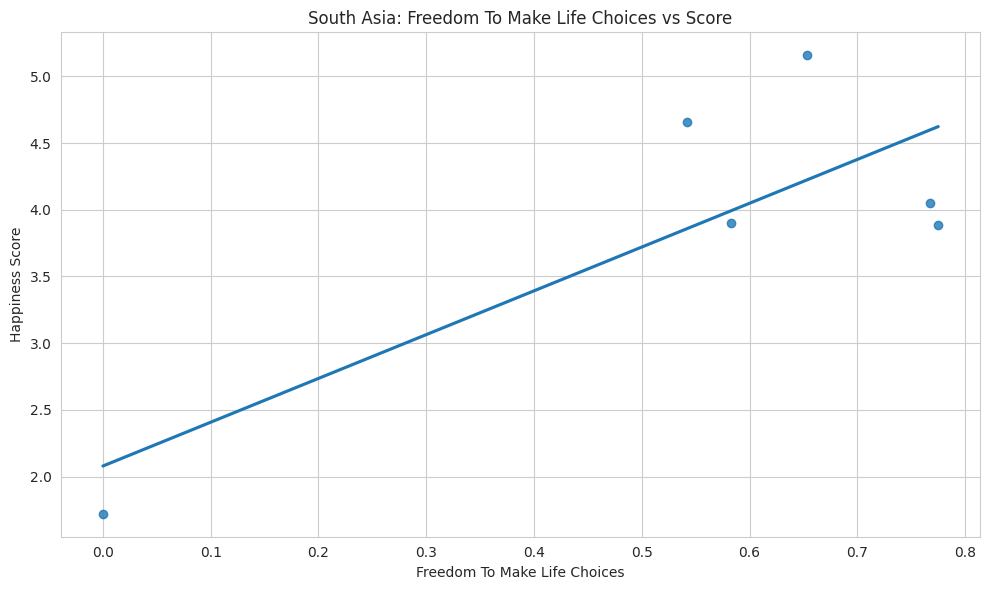

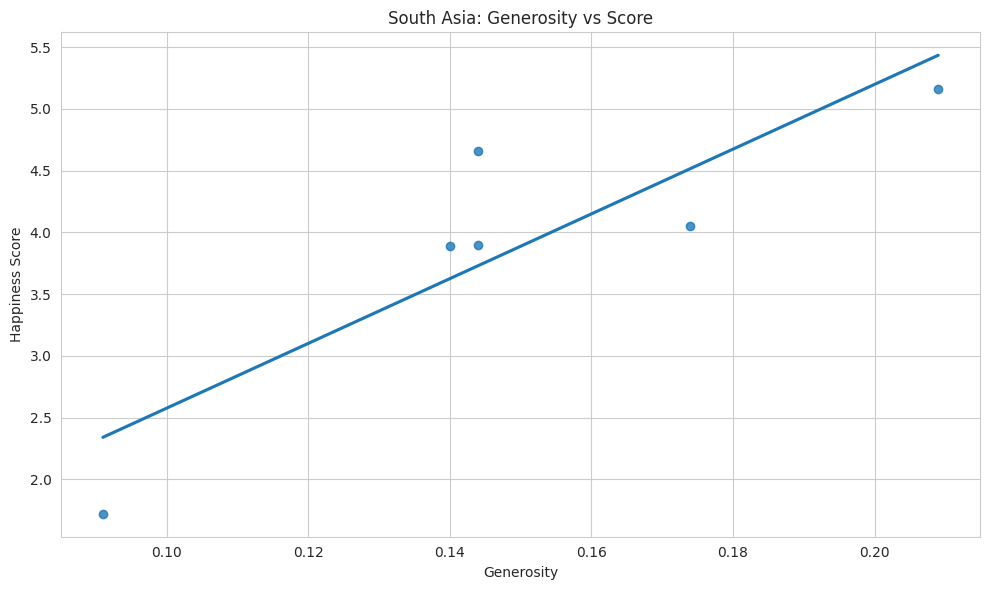

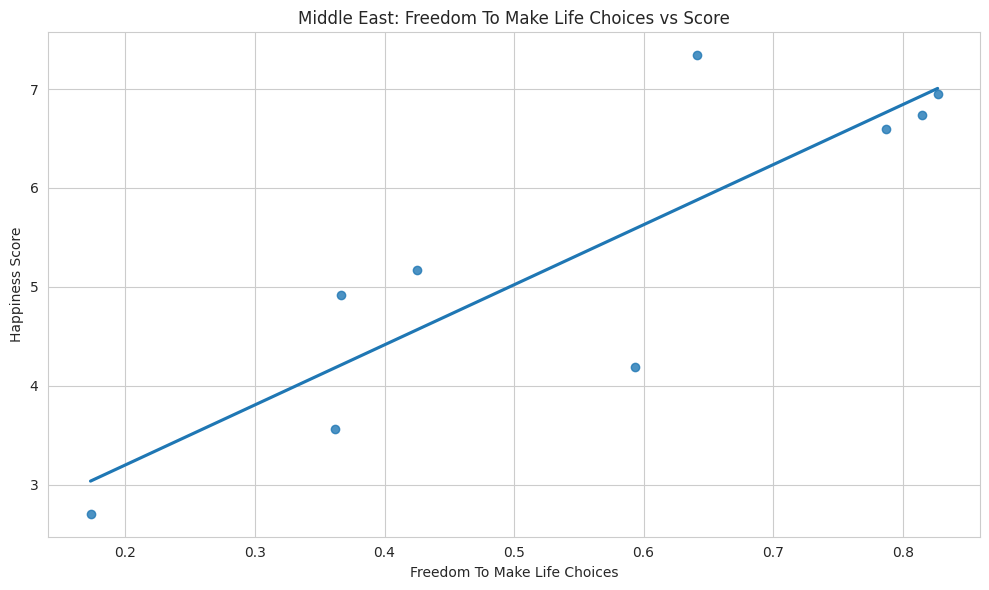

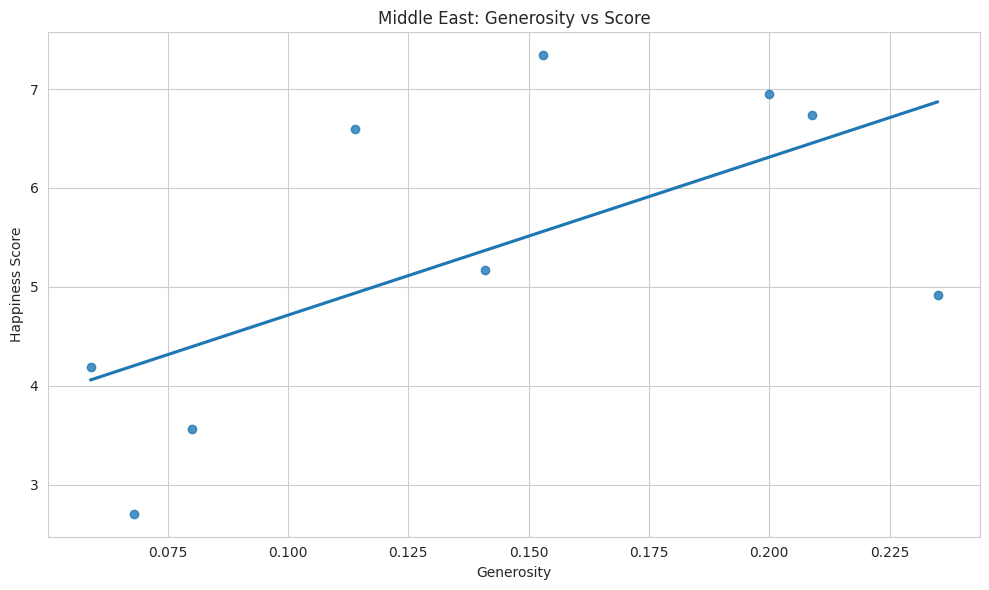

In [71]:
# Metrics for correlation analysis
metric_freedom = 'freedom_to_make_life_choices'
metric_generosity = 'generosity'

# Plots for South Asia
# South Asia: Freedom to Make Life Choices vs Score
plt.figure()
sns.regplot(x=south_asia_df[metric_freedom], y=south_asia_df["score"], ci=None)
plt.xlabel(metric_freedom.replace("_", " ").title())
plt.ylabel("Happiness Score")
plt.title(f"South Asia: {metric_freedom.replace('_', ' ').title()} vs Score")
plt.tight_layout()
plt.show()
print("\n")

# South Asia: Generosity vs Score
plt.figure()
sns.regplot(x=south_asia_df[metric_generosity], y=south_asia_df["score"], ci=None)
plt.xlabel(metric_generosity.replace("_", " ").title())
plt.ylabel("Happiness Score")
plt.title(f"South Asia: {metric_generosity.replace('_', ' ').title()} vs Score")
plt.tight_layout()
plt.show()
print("\n")

# Plots for Middle East
# Middle East: Freedom to Make Life Choices vs Score
plt.figure()
sns.regplot(x=middle_east_df[metric_freedom], y=middle_east_df["score"], ci=None)
plt.xlabel(metric_freedom.replace("_", " ").title())
plt.ylabel("Happiness Score")
plt.title(f"Middle East: {metric_freedom.replace('_', ' ').title()} vs Score")
plt.tight_layout()
plt.show()
print("\n")

# Middle East: Generosity vs Score
plt.figure()
sns.regplot(x=middle_east_df[metric_generosity], y=middle_east_df["score"], ci=None)
plt.xlabel(metric_generosity.replace("_", " ").title())
plt.ylabel("Happiness Score")
plt.title(f"Middle East: {metric_generosity.replace('_', ' ').title()} vs Score")
plt.tight_layout()
plt.show()
print("\n")

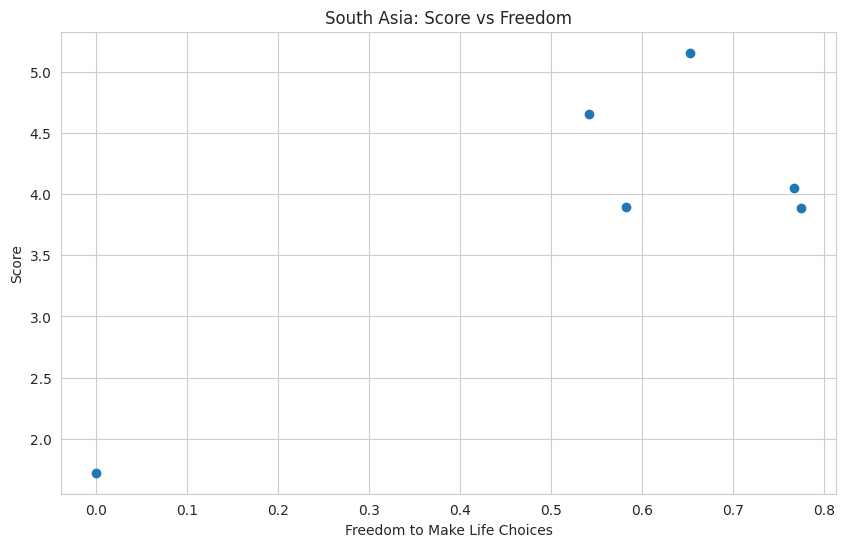

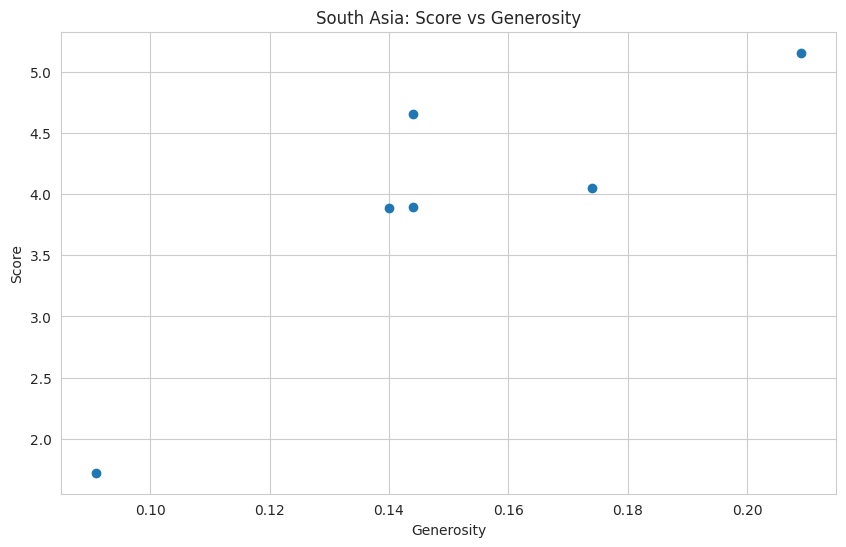

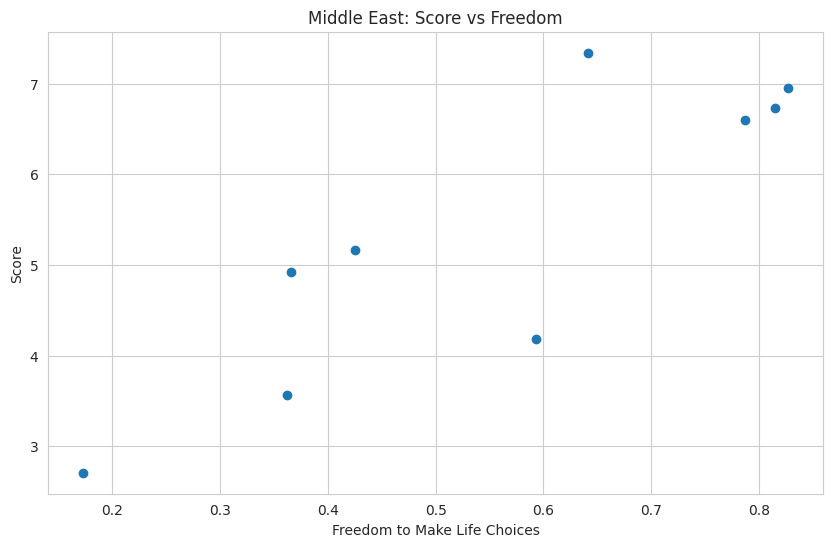

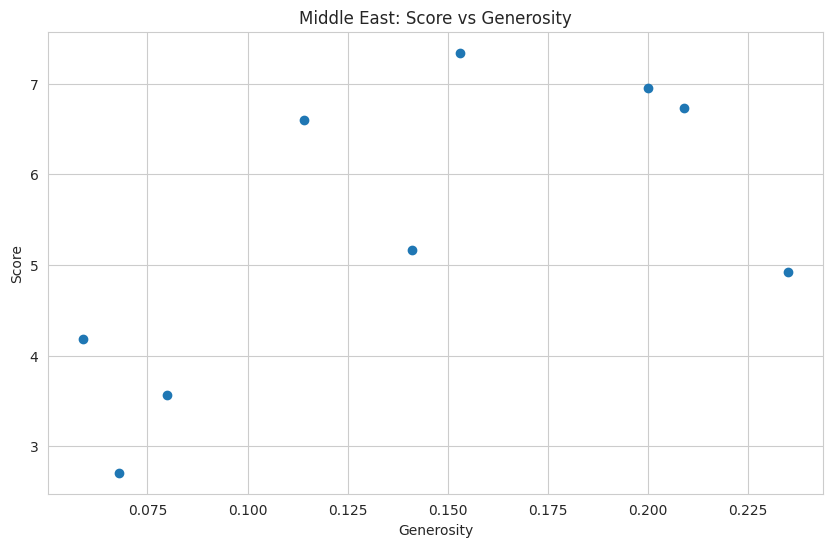

In [72]:
# Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(10,6))
plt.scatter(south_asia_df['freedom_to_make_life_choices'], south_asia_df['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('South Asia: Score vs Freedom')
plt.grid(True)
plt.show()
print("\n")

plt.scatter(south_asia_df['generosity'], south_asia_df['score'])
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('South Asia: Score vs Generosity')
plt.grid(True)
plt.show()
print("\n")

plt.scatter(middle_east_df['freedom_to_make_life_choices'], middle_east_df['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Middle East: Score vs Freedom')
plt.grid(True)
plt.show()
print("\n")

plt.scatter(middle_east_df['generosity'], middle_east_df['score'])
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Middle East: Score vs Generosity')
plt.grid(True)
plt.show()
print("\n")

6. Outlier Detection:


• Identify outlier countries in both regions based on Score and GDP per Capita.


In [73]:
def find_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

print("Outlier countries based on Score and GDP per Capita in each region:\n")


for region_name, region_df_single in combined_region_df.groupby("region"):
  print(f"Region: {region_name}")


  # Calculate bounds for score and GDP per capita in this region
  r_score_lower, r_score_upper = find_outlier_bounds(region_df_single["score"])
  r_gdp_lower, r_gdp_upper = find_outlier_bounds(region_df_single["gdp_per_capita"])


  print(f" Score outlier bounds: [{r_score_lower:.3f}, {r_score_upper:.3f}]")
  print(f" GDP outlier bounds : [{r_gdp_lower:.3f}, {r_gdp_upper:.3f}]")


  # Identify outliers
  is_outlier_region = (
  (region_df_single["score"] < r_score_lower) | (region_df_single["score"] > r_score_upper)
  | (region_df_single["gdp_per_capita"] < r_gdp_lower) | (region_df_single["gdp_per_capita"] > r_gdp_upper)
  )


  outliers_region = region_df_single[is_outlier_region]
  print(" Outliers:")
  print(outliers_region[["country_name", "score", "gdp_per_capita"]])

Outlier countries based on Score and GDP per Capita in each region:

Region: Middle East
 Score outlier bounds: [1.336, 9.860]
 GDP outlier bounds : [0.392, 2.712]
 Outliers:
Empty DataFrame
Columns: [country_name, score, gdp_per_capita]
Index: []
Region: South Asia
 Score outlier bounds: [2.963, 5.432]
 GDP outlier bounds : [0.745, 1.401]
 Outliers:
  country_name  score  gdp_per_capita
5  Afghanistan  1.721           0.628


• Plot these outliers and discuss their implications.


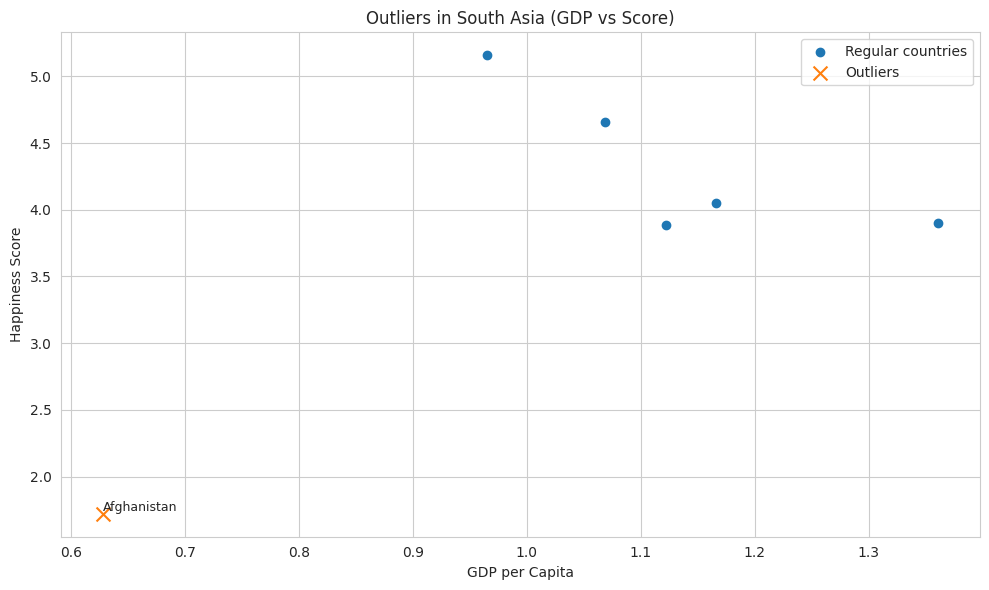

In [74]:
# Scatter plot showing all countries and highlighting outliers
plt.figure()


# Non-outliers
non_outliers_region = region_df_single[~is_outlier_region]
plt.scatter(non_outliers_region["gdp_per_capita"], non_outliers_region["score"], label="Regular countries")


# Outliers
plt.scatter(outliers_region["gdp_per_capita"], outliers_region["score"], marker="x", s=100, label="Outliers")


for _, row in outliers_region.iterrows():
  plt.text(row["gdp_per_capita"], row["score"], row["country_name"], fontsize=9, ha="left", va="bottom")


plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title(f"Outliers in {region_name} (GDP vs Score)")
plt.legend()
plt.tight_layout()
plt.show()

7. Visualization:


• Create boxplots comparing the distribution of Score between South Asia and the Middle East.


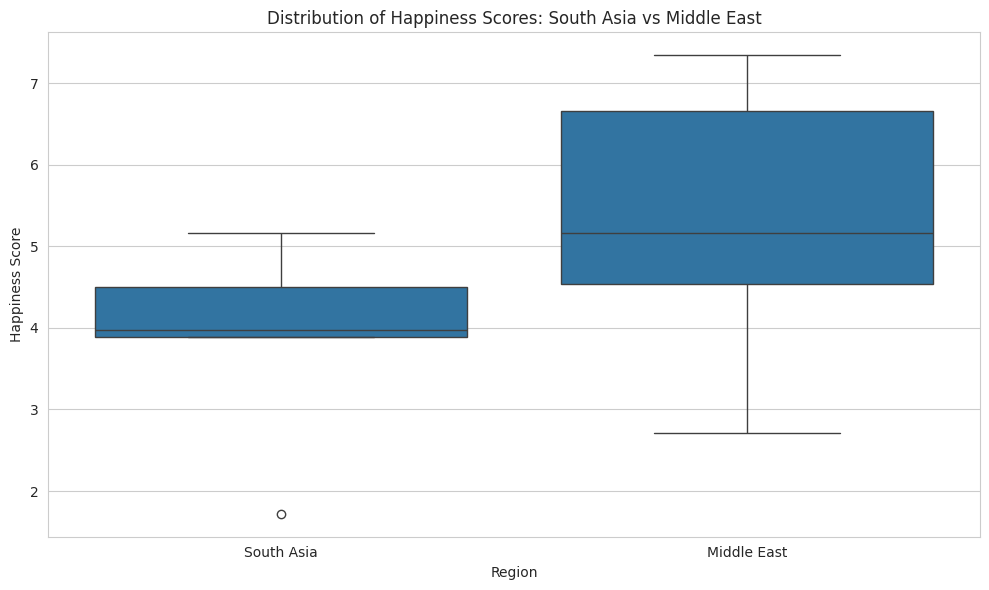

In [75]:
plt.figure()
sns.boxplot(x="region", y="score", data=combined_region_df)
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.title("Distribution of Happiness Scores: South Asia vs Middle East")
plt.tight_layout()
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.


**Interpretation:**

*   Medians: Compared to South Asia (~ 3.9), the Middle East has a far higher median happiness score (~5.4). This is evidence of the Gulf countries' increased overall economic success.

*   Spread (IQR): The Middle East box is "taller," showing a greater range of scores. High inequality results from the region's combination of extremely wealthy countries (Saudi Arabia, the United Arab Emirates) and conflict-affected areas (Lebanon, Yemen). The smaller size of South Asia suggests that living standards are comparable throughout the region.

*   Outliers: The Middle East shows variability but fewer severe low outliers in comparison to its own distribution, whereas Afghanistan continues to be a clear low outlier for South Asia.